# Formatting and then modelling


In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from PIL import Image 

from sklearn import metrics 

import cv2 
import os 

from glob import glob 
!pip install tensorflow

import tensorflow as tf 
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

import warnings 
warnings.filterwarnings('ignore')


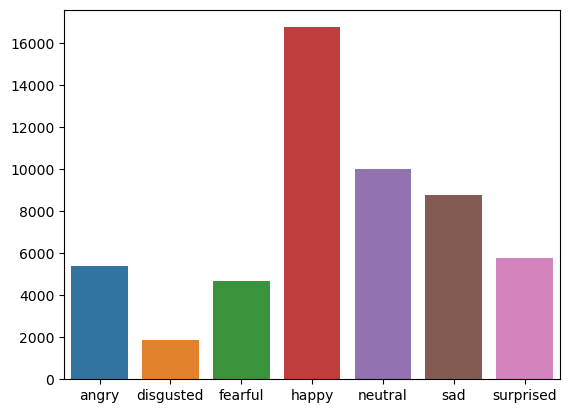

In [31]:
path = 'C:/Users/srava/Downloads/Dataset/train'
classes = os.listdir(path) 
classes
count = [] 
for cat in classes: 
	count.append(len(os.listdir(f'{path}/{cat}'))) 
sb.barplot(classes, count) 
plt.show()


In [32]:
path = 'C:/Users/srava/Downloads/Dataset/test'
classes = os.listdir(path) 
classes


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

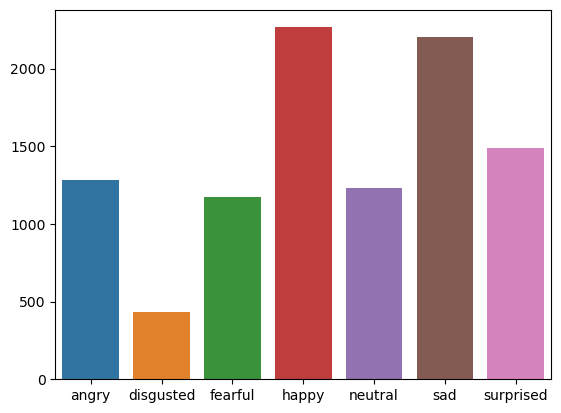

In [33]:
count=[]
for cat in classes: 
	count.append(len(os.listdir(f'{path}/{cat}'))) 
sb.barplot(classes, count) 
plt.show()


# Formatting of the images & transformation

# ON TRAINING DATASET

In [ ]:
import os
from PIL import Image

def convert_to_48x48_png(image_path):
    # Open image using PIL
    img = Image.open(image_path)
    
    # Check if image is already 48x48 and PNG
    if img.size == (48, 48) and img.format == 'PNG':
        print(f"Skipping {image_path} - Already 48x48 PNG")
        return
    
    # Convert to 48x48 grayscale PNG
    img = img.convert('L')  # Convert to grayscale if not already
    img = img.resize((48, 48))  # Resize to 48x48
    
    # Save as PNG
    new_path = os.path.splitext(image_path)[0] + '.png'
    img.save(new_path, format='PNG')
    
    print(f"Converted {image_path} to {new_path}")

# Directory containing subdirectories with images
train_dir = 'C:/Users/srava/Downloads/Dataset/train'

# Iterate through each subdirectory
for root, _, files in os.walk(train_dir):
    for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            image_path = os.path.join(root, filename)
            convert_to_48x48_png(image_path)


# ON TESTING DATASET

In [ ]:
import os
from PIL import Image

def convert_to_48x48_png(image_path):
    # Open image using PIL
    img = Image.open(image_path)
    
    # Check if image is already 48x48 and PNG
    if img.size == (48, 48) and img.format == 'PNG':
        print(f"Skipping {image_path} - Already 48x48 PNG")
        return
    
    # Convert to 48x48 grayscale PNG
    img = img.convert('L')  # Convert to grayscale if not already
    img = img.resize((48, 48))  # Resize to 48x48
    
    # Save as PNG
    new_path = os.path.splitext(image_path)[0] + '.png'
    img.save(new_path, format='PNG')
    
    print(f"Converted {image_path} to {new_path}")

# Directory containing subdirectories with images
train_dir = 'C:/Users/srava/Downloads/Dataset/test'

# Iterate through each subdirectory
for root, _, files in os.walk(train_dir):
    for filename in files:
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            image_path = os.path.join(root, filename)
            convert_to_48x48_png(image_path)

# Training data

In [34]:

train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255) 
  
train_gen = train_datagen.flow_from_directory( 
        'C:/Users/srava/Downloads/Dataset/train', 
        target_size=(48,48), 
        batch_size=64, 
        color_mode="grayscale", 
        class_mode='categorical')

Found 53251 images belonging to 7 classes.


# Testing data

In [35]:
val_gen = val_datagen.flow_from_directory( 
        'C:/Users/srava/Downloads/Dataset/test', 
        target_size=(48,48), 
        batch_size=64, 
        color_mode="grayscale", 
        class_mode='categorical')

Found 10076 images belonging to 7 classes.


# List of Emotions

In [36]:
emotions = list(train_gen.class_indices.keys())

# Applying Sequential CNN Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([ 
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),									 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D(2, 2), 
    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.BatchNormalization(),								 
    layers.Dense(32, activation='relu'), 
    layers.Dropout(0.3), 
    layers.BatchNormalization(), 
    layers.Dense(7, activation='softmax') 
])
model.compile( 
	optimizer = 'adam', 
	loss = 'categorical_crossentropy', 
	metrics=['accuracy'] 
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,004,039 (7.64 MB)

 Trainable params: 2,003,847 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

# Early stopping & Learning rate

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if logs.get('val_accuracy') > 0.90: 
            print('\n Validation accuracy has reached upto 90% so, stopping further training.') 
            self.model.stop_training = True

es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True) 
lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

# Model Fitting

In [41]:
history = model.fit(train_gen, 
					validation_data = val_gen, 
					epochs = 50, 
					verbose = 1, 
					callbacks = [es, lr, myCallback()])

Epoch 1/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 179s 209ms/step - accuracy: 0.3809 - loss: 1.6764 - val_accuracy: 0.4430 - val_loss: 1.4497 - learning_rate: 0.0010
Epoch 2/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 133s 159ms/step - accuracy: 0.5757 - loss: 1.1357 - val_accuracy: 0.4829 - val_loss: 1.3899 - learning_rate: 0.0010
Epoch 3/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 126s 150ms/step - accuracy: 0.6193 - loss: 1.0290 - val_accuracy: 0.5068 - val_loss: 1.2949 - learning_rate: 0.0010
Epoch 4/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 128s 153ms/step - accuracy: 0.6499 - loss: 0.9546 - val_accuracy: 0.5314 - val_loss: 1.2734 - learning_rate: 0.0010
Epoch 5/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 128s 153ms/step - accuracy: 0.7017 - loss: 0.8114 - val_accuracy: 0.5361 - val_loss: 1.3229 - learning_rate: 0.0010
Epoch 6/50
833/833 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7322 - loss: 0.7283
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
833/833 ━━━━━━━━━━━━━━━━━━━━ 127s 152ms/step - accuracy:

In [1]:
def plot_image(img, emoj): 
	wmin = 256
	hmin = 256

	emoj = cv2.resize(emoj, (wmin, hmin)) 
	img = cv2.resize(img, (wmin, hmin)) 
	cv2.imshow('Images', cv2.hconcat([img, emoj]))


# PRESET

In [15]:
import tkinter as tk

# Function to read text from file
def read_text_from_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Create the main window
root = tk.Tk()
root.title("Huge Text Display")

# Path to your text file
file_path = 'textfile.txt'

# Read the text from the file
huge_text_content = read_text_from_file(file_path)

# Create a label with huge text from the file content
huge_text = tk.Label(root, text=huge_text_content, font=("Helvetica", 13, "bold"), wraplength=800)

# Pack the label into the window
huge_text.pack(pady=20, padx=20)

# Start the Tkinter event loop
root.mainloop()


# REAL TIME + VIDEO FILE ANALYSIS IN tkinter UI

# FINAL CODE WITH tkinter UI

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import tkinter as tk
from tkinter import Label, Button, filedialog
from PIL import Image, ImageTk
import time

# Load the model and Haar Cascade file for face detection
model = load_model('merge_model.keras')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the emotion classes
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Initialize counters for emotions
emotion_counts = {'sad': 0, 'neutral': 0, 'happy': 0, 'angry': 0, 'surprise': 0, 'fear': 0, 'disgust': 0}

global ratio

class EmotionDetectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Emotion Detection")

        # Set the background color
        self.root.configure(bg='lightgrey')

        # Initialize video capture and video file path
        self.cap = None
        self.video_path = None
        self.video_mode = False  # True if video file is selected

        # Frame size settings
        self.webcam_width = 500
        self.webcam_height = 540
        self.video_width = 420
        self.video_height = 540

        # Initialize timer variables
        self.start_time = None
        self.timer_running = False

        # Set up UI elements
        self.label = Label(root, bg='lightgrey')
        self.label.pack()

        self.stats_label = Label(root, text="", font=("Helvetica", 12), bg='lightgrey')
        self.stats_label.pack(pady=10)

        self.timer_label = Label(root, text="Timer: 00:00", font=("Helvetica", 12, 'bold'), bg='lightgrey', fg='red')
        self.timer_label.pack(pady=5)

        # Frame for buttons
        self.button_frame = tk.Frame(root, bg='lightgrey')
        self.button_frame.pack(pady=10)

        button_config = {
            'padx': 10,
            'pady': 5,
            'bg': '#4CAF50',  # Green background
            'fg': 'white',
            'font': ('Helvetica', 12)
        }

        self.start_button = Button(self.button_frame, text="Start", command=self.start, **button_config)
        self.start_button.pack(side=tk.LEFT)

        self.stop_button = Button(self.button_frame, text="Stop", command=self.stop, **button_config)
        self.stop_button.pack(side=tk.LEFT)

        self.reset_button = Button(self.button_frame, text="Reset", command=self.reset, **button_config)
        self.reset_button.pack(side=tk.LEFT)

        self.select_file_button = Button(self.button_frame, text="Select Video File", command=self.select_file, **button_config)
        self.select_file_button.pack(side=tk.LEFT)

        self.show_conc_button = Button(self.button_frame, text="Show Conclusion", command=self.show_conc, **button_config)
        self.show_conc_button.pack(side=tk.LEFT)

        self.running = False

        # Fixed text note at the bottom
        self.fixed_note = Label(root, text=("Note: The analysis is based on detected emotions.\n\n"
                                            "Short-Term Observations: minutes to hours\n"
                                            "May not provide a comprehensive picture of overall emotional well-being.\n"
                                            "Medium-Term Observations: Several days to a weeks\n"
                                            "To study on mood fluctuations, the impact of interventions and the influence of daily routines.\n"
                                            "Long-Term Observations: Several weeks to months\n"
                                            "Understanding of an individual's emotional patterns, identify consistent trends.")
                                , font=("Helvetica", 10), bg='lightgrey', wraplength=300)
        self.fixed_note.pack(side=tk.BOTTOM, anchor='se', padx=10, pady=10)

    def select_file(self):
        self.video_path = filedialog.askopenfilename(filetypes=[("Video Files", "*.mp4;*.avi")])
        if self.video_path:
            self.video_mode = True
            self.cap = cv2.VideoCapture(self.video_path)
            self.start()

    def start(self):
        if self.cap is None:
            self.cap = cv2.VideoCapture(0)
            self.video_mode = False  # Webcam mode
        self.running = True
        self.start_time = time.time()
        self.update_frame()

    def stop(self):
        self.running = False
        if self.cap:
            self.cap.release()
        self.timer_running = False

    def reset(self):
        global emotion_counts
        emotion_counts = {key: 0 for key in emotion_counts.keys()}
        self.stats_label.config(text="")
        self.timer_label.config(text="Timer: 00:00")

    def update_frame(self):
        if self.running:
            ret, frame = self.cap.read()
            if not ret:
                if self.video_mode:
                    # End of video file
                    self.running = False
                    self.cap.release()
                    self.show_stats()
                return

            # Resize frame based on mode
            if self.video_mode:
                frame = cv2.resize(frame, (self.video_width, self.video_height))
            else:
                frame = cv2.resize(frame, (self.webcam_width, self.webcam_height))

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y, w, h) in faces:
                face_roi = gray[y:y+h, x:x+w]
                face_roi = cv2.resize(face_roi, (48, 48))
                face_roi = np.expand_dims(face_roi, axis=-1)
                face_roi = np.expand_dims(face_roi, axis=0)

                pred = model.predict(face_roi)
                idx = pred.argmax(axis=-1)[0]
                emotion = classes[idx]

                if emotion in emotion_counts:
                    emotion_counts[emotion] += 1

                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(img)
            imgtk = ImageTk.PhotoImage(image=img)
            self.label.imgtk = imgtk
            self.label.configure(image=imgtk)

            self.show_stats()
            self.update_timer()

            self.root.after(10, self.update_frame)
        else:
            if self.cap:
                self.cap.release()

    def update_timer(self):
        if self.running:
            elapsed_time = time.time() - self.start_time
            minutes, seconds = divmod(int(elapsed_time), 60)
            timer_text = f"Timer: {minutes:02}:{seconds:02}"
            self.timer_label.config(text=timer_text)
            self.root.after(1000, self.update_timer)  # Update every second

    def show_stats(self):
        sad_neutral_count = emotion_counts['sad'] + emotion_counts['neutral'] // 2
        happy_count = emotion_counts['happy'] + emotion_counts['surprise'] + emotion_counts['neutral'] // 2
        negative_count = emotion_counts['angry']

        global ratio
        if happy_count > 0:
            ratio = (sad_neutral_count + negative_count) / happy_count
        else:
            ratio = float('inf')

        stats_text = "Emotion counts during the session:\n"
        for emotion, count in emotion_counts.items():
            stats_text += f"{emotion.capitalize()}: {count}\n"

        stats_text += f"Ratio of (Sad + Neutral + Negative) to Happy frames: {ratio:.2f}\n"

        self.stats_label.config(text=stats_text)

    def show_conc(self):
        conc = "The derived Conclusion is:\n"
        if ratio < 0.38:
            conc += ("The individual is in a positive emotional state, possibly feeling joy, contentment, or being in a stimulating and enjoyable environment. "
                      "The type of activities or interactions the individual is engaged in can also affect their emotional state, indicating more positive interactions.")
        elif 0.38 <= ratio < 0.48:
            conc += "The emotional state may be concerning."
        else:
            conc += ("The individual is experiencing a generally negative or subdued emotional state. This might suggest stress, fatigue, sadness, or a lack of positive stimuli during the recording period. "
                      "Indicative of underlying mental health issues such as depression or anxiety. The environment in which the recording takes place can significantly impact the emotions displayed. "
                      "For instance, a monotonous or stressful environment might result in more sad and neutral frames.")

        ratio_window = tk.Toplevel(self.root)
        ratio_window.title("Emotion Conclusion")

        ratio_label = Label(ratio_window, text=conc, font=("Helvetica", 14), wraplength=400)
        ratio_label.pack(pady=20, padx=20)

if __name__ == "__main__":
    root = tk.Tk()
    app = EmotionDetectionApp(root)
    root.mainloop()


C:\Users\srava\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━